In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

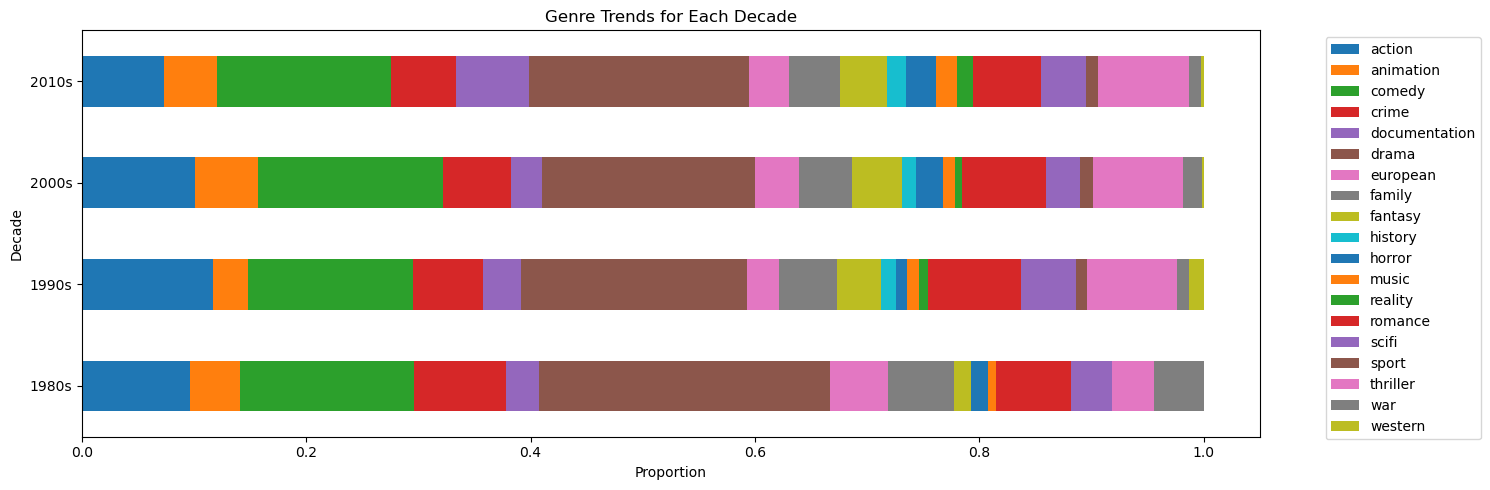

In [108]:
# Run trends_analysis python file
%run trends_analysis.py

In [109]:
# Loading the 'credits.csv' file into a DataFrame named 'credit'
credit = pd.read_csv("credits.csv")
# Load binned_table.csv located in output folder
titles = pd.read_csv("output/binned_table.csv")

In [110]:
credit.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [111]:
# leave only movie in data
#titles_movie = (titles['type'] == 'SHOW')
#titles = titles[~titles_movie]

In [112]:
# sort by release year 
#titles = titles.sort_values(by = ['release_year'], ascending = True)

In [113]:
# Calculate the number of missing values for each column in 'titles' DataFrame
missing_data = titles.isna().sum()
print(missing_data)

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
decades                    0
dtype: int64


In [114]:
# Remove the column named 'title' from the 'titles' dataframe and store in a new dataframe df_cleaned
df_cleaned = titles.dropna(subset = ['title'])
df_cleaned

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,decades
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,40
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,70
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,70
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,70
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN,120
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN,120
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,120
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000,120


In [115]:
# Calculate the mean of 4 columns named'imdb socre, imdb votes, tmdb popularity and tmdb score' and fill the missing values in each columns with its mean value in the cleaned dataframe 'df_cleand'
imdb_score_mean = df_cleaned['imdb_score'].mean()
imdb_votes_mean = df_cleaned['imdb_votes'].mean()
tmdb_popularity_mean = df_cleaned['tmdb_popularity'].mean()
tmdb_score_mean = df_cleaned['tmdb_score'].mean()

df_cleaned['imdb_score'].fillna(imdb_score_mean, inplace = True)
df_cleaned['imdb_votes'].fillna(imdb_votes_mean, inplace = True)
df_cleaned['tmdb_popularity'].fillna(tmdb_popularity_mean, inplace = True)
df_cleaned['tmdb_score'].fillna(tmdb_score_mean, inplace = True)

In [116]:
# Check the amount of missing values in each column after processed the missing data
df_cleaned.isna().sum()

id                         0
title                      0
type                       0
description               17
release_year               0
age_certification       2618
runtime                    0
genres                     0
production_countries       0
seasons                 3743
imdb_id                  403
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
decades                    0
dtype: int64

In [117]:
df_cleaned['genres']

0                                 ['documentation']
1                                ['drama', 'crime']
2       ['drama', 'action', 'thriller', 'european']
3                   ['fantasy', 'action', 'comedy']
4                                 ['war', 'action']
                           ...                     
5845                           ['romance', 'drama']
5846                                      ['drama']
5847                                     ['comedy']
5848                                             []
5849              ['family', 'animation', 'comedy']
Name: genres, Length: 5849, dtype: object

In [118]:
# Apply to each element in the column named 'genres', if it's not a missing value than will be process by the ast function and if it is a missing value it will assign a empty list to prevent a error due to unable 
# to evalaute while processing.
df_cleaned['genres'] = df_cleaned['genres'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

In [119]:
# Check the data tyoe if element in column 'genre' after preprocessed
df_cleaned['genres'][0][0]

'documentation'

In [120]:
# Undergo one hot encoding to put all outcomes in the 'genres' column in to a new column objects fall under one or more specifc genre will present a 1 under corresponding column otherwise an 0.
genres_dummies = pd.get_dummies(df_cleaned['genres'].explode(), prefix='genre')
genres_dummies = genres_dummies.groupby(level=0).sum()
# Contact the new dummie variables with the previous data frame 'df_cleaned' name 'df_encoded'
df_encoded = pd.concat([df_cleaned, genres_dummies], axis=1)
# Display the new data frame
df_encoded

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,genre_history,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],['US'],1.0,...,0,0,0,0,0,0,0,0,0,0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",['US'],NaN,...,0,0,0,0,0,0,0,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",['GB'],NaN,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","['GB', 'US']",NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"[romance, drama]",['NG'],NaN,...,0,0,0,0,1,0,0,0,0,0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,[drama],[],NaN,...,0,0,0,0,0,0,0,0,0,0
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,[comedy],['CO'],NaN,...,0,0,0,0,0,0,0,0,0,0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# Create sepreate rows for each different genre for rows where 'genres' contains multiple genre labels
df_exploded = df_encoded.explode('genres')
# Calculate the number of the occurrences of each genre in the 'genres' column to provided an clear view of how many shows or movies fall under each genre.
genres_counts = df_exploded['genres'].value_counts()
print(genres_counts)

drama            2968
comedy           2325
thriller         1228
action           1157
romance           971
documentation     952
crime             936
animation         705
family            682
fantasy           630
scifi             589
european          443
horror            378
music             262
history           254
reality           234
sport             170
war               163
western            41
Name: genres, dtype: int64


In [122]:
# Remove the columns of data which is useless. genres are also now useless cause we created a unique column for each genre.
droped = ['seasons', 'age_certification', 'genres', 'imdb_id']
df_cleaned = df_encoded.drop(columns = droped)

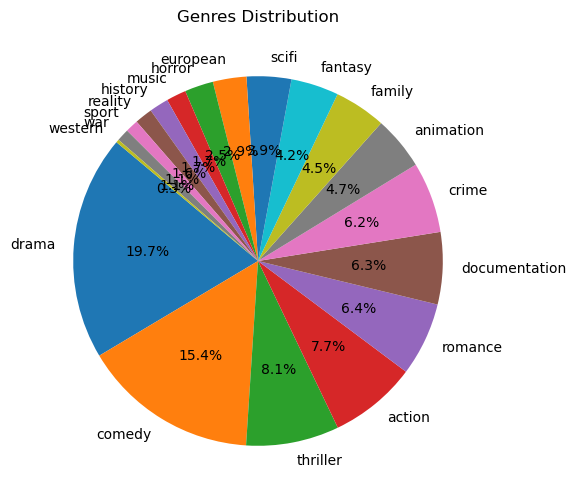

In [123]:
# Aet up a specified size
plt.figure(figsize=(6,6))
# Create a bar chart with the genre names as lables of each segment and a set format for precentage each segment took abd rotated start of the chart to make it look nicer
plt.pie(genres_counts, labels = genres_counts.index, autopct='%1.1f%%', startangle = 140)
# Set the title for the pie chart 'Genres Distribution'
plt.title('Genres Distribution')
# Display the pie chart
plt.show()

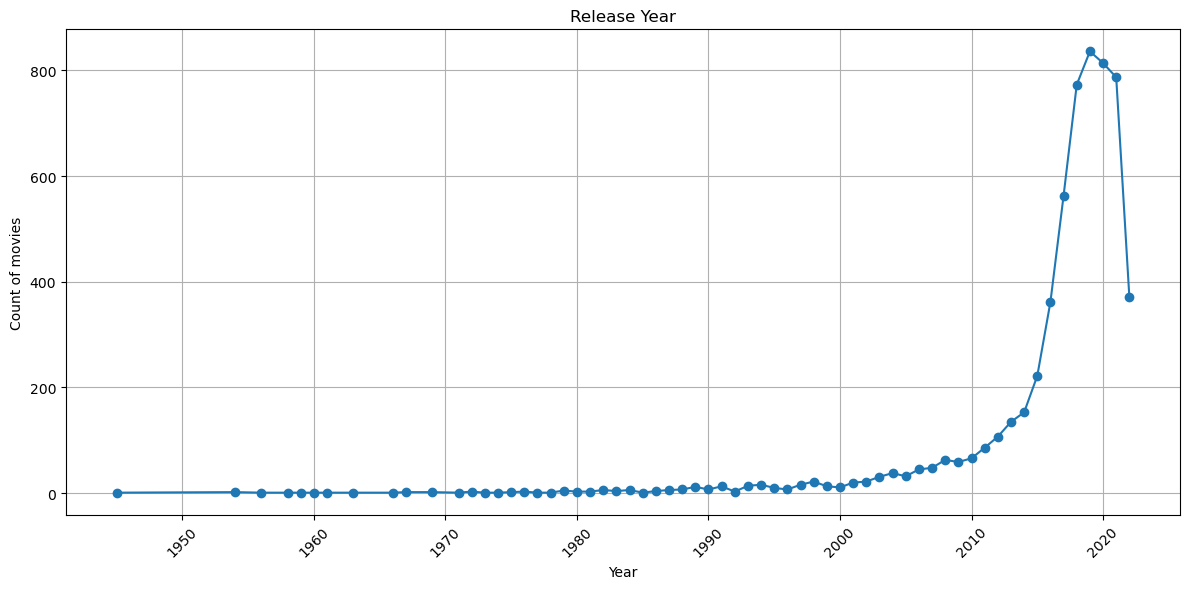

In [124]:
# Compute the count of movies for each 'release_year' and sort the counts by year.
year_counts = df_cleaned['release_year'].value_counts().sort_index()
# Plot data
fig, axis = plt.subplots(figsize = (12, 6))
axis.plot(year_counts.index, year_counts.values, marker = 'o', linestyle = '-')
axis.set_title('Release Year')
axis.set_xlabel('Year')
axis.set_ylabel('Count of movies')
axis.tick_params(axis = 'x', rotation = 45)  
axis.grid(True)
plt.tight_layout()
plt.show()

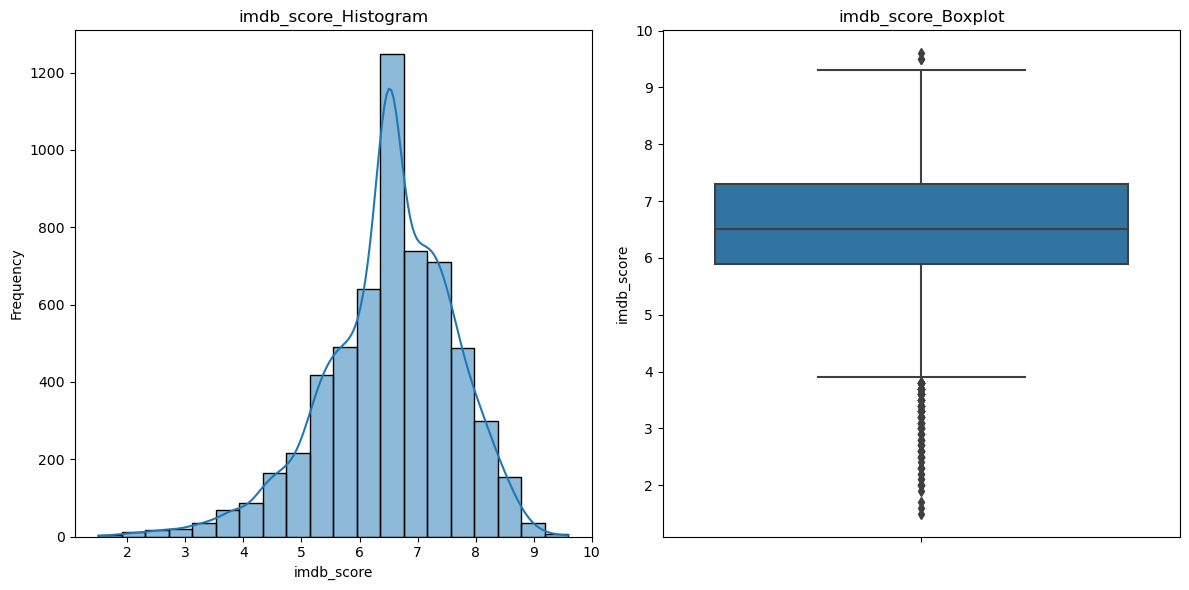

In [125]:
# Plot data
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['imdb_score'], bins = 20, kde = True).set(title = 'imdb_score_Histogram', xlabel = 'imdb_score', ylabel = 'Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(y = df_cleaned['imdb_score']).set(title = 'imdb_score_Boxplot', ylabel = 'imdb_score')
plt.tight_layout()
plt.show()

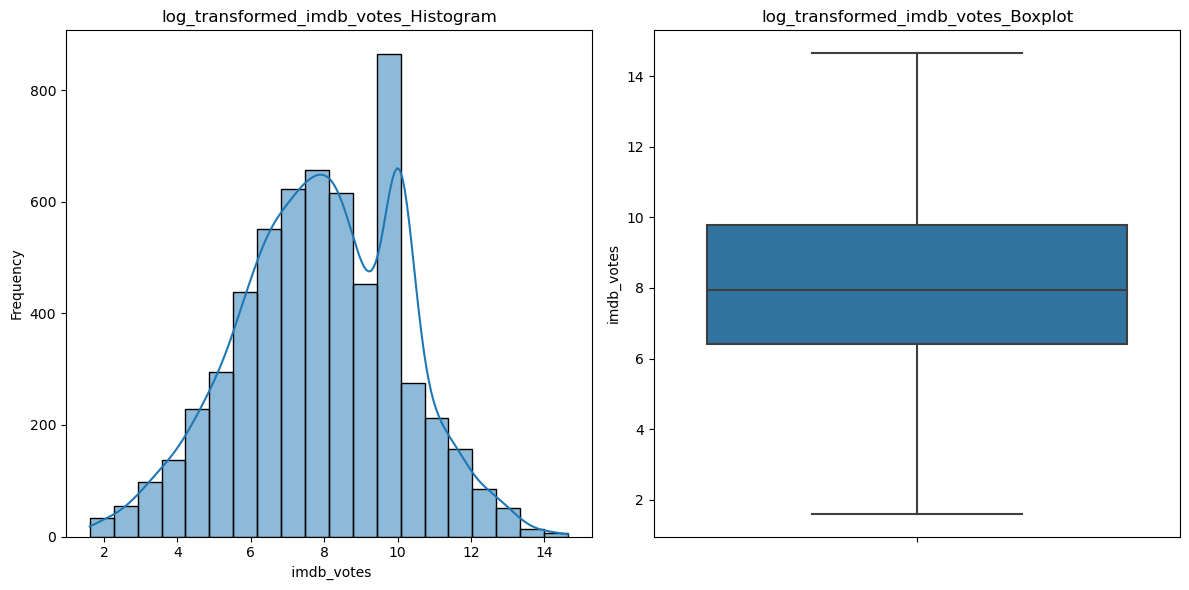

In [126]:
# Plot data
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
# Undergoes a log tranformed to 'imdb_votes' due to the orginal datas are too skewed.
sns.histplot(np.log(df_cleaned['imdb_votes']), bins = 20, kde = True).set(title = 'log_transformed_imdb_votes_Histogram', xlabel =' imdb_votes', ylabel = 'Frequency')
plt.subplot(1, 2, 2) 
sns.boxplot(y = np.log(df_cleaned['imdb_votes'])).set(title = 'log_transformed_imdb_votes_Boxplot', ylabel = 'imdb_votes')
plt.tight_layout()
plt.show()


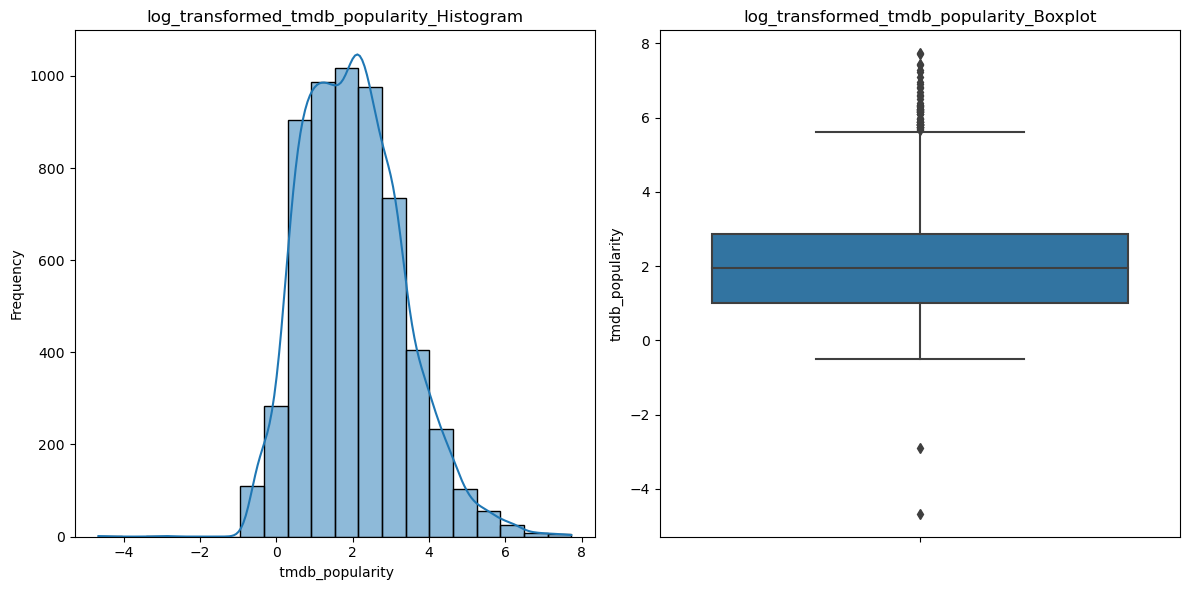

In [127]:
plt.figure(figsize = (12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(np.log(df_cleaned['tmdb_popularity']), bins = 20, kde = True).set(title = 'log_transformed_tmdb_popularity_Histogram', xlabel =' tmdb_popularity', ylabel = 'Frequency')

# Boxplot
plt.subplot(1, 2, 2) 
sns.boxplot(y = np.log(df_cleaned['tmdb_popularity'])).set(title = 'log_transformed_tmdb_popularity_Boxplot', ylabel = 'tmdb_popularity')

plt.tight_layout()
plt.show()


In [128]:
# Encode the column 'types' in to numbers for steps afterwards
label_encoder = LabelEncoder()
df_cleaned['type'] = label_encoder.fit_transform(df_cleaned['type'])
df_cleaned

,id,title,type,description,release_year,runtime,production_countries,imdb_score,imdb_votes,tmdb_popularity,...,genre_history,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western
0,ts300399,Five Came Back: The Reference Films,1,This collection includes 12 World War II-era p...,1945,51,['US'],6.510861,23439.382474,0.600000,...,0,0,0,0,0,0,0,0,0,0
1,tm84618,Taxi Driver,0,A mentally unstable Vietnam War veteran works ...,1976,114,['US'],8.200000,808582.000000,40.965000,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,0,Intent on seeing the Cahulawassee River before...,1972,109,['US'],7.700000,107673.000000,10.010000,...,0,0,0,0,0,0,0,1,0,0
3,tm127384,Monty Python and the Holy Grail,0,"King Arthur, accompanied by his squire, recrui...",1975,91,['GB'],8.200000,534486.000000,15.461000,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,0,12 American military prisoners in World War II...,1967,150,"['GB', 'US']",7.700000,72662.000000,20.398000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,0,A beautiful love story that can happen between...,2021,100,['NG'],6.800000,45.000000,1.466000,...,0,0,0,0,1,0,0,0,0,0
5846,tm898842,C/O Kaadhal,0,A heart warming film that explores the concept...,2021,134,[],7.700000,348.000000,22.637925,...,0,0,0,0,0,0,0,0,0,0
5847,tm1059008,Lokillo,0,A controversial TV host and comedian who has b...,2021,90,['CO'],3.800000,68.000000,26.005000,...,0,0,0,0,0,0,0,0,0,0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,0,"Jamie Foxx, David Alan Grier and more from the...",2021,37,['US'],6.510861,23439.382474,1.296000,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# Normalize the numerical datas we needed
scaler = StandardScaler()
scaler_column = ['release_year','imdb_score','imdb_votes', 'tmdb_popularity']
df_cleaned[scaler_column] = scaler.fit_transform(df_cleaned[scaler_column])

In [130]:
# Finalize the preprocessed dataframe decide which columns are needed.
kept_col = ['type', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'genre_action', 'genre_animation', 'genre_crime', 'genre_comedy', 'genre_documentation', 'genre_drama', 'genre_european', 
            'genre_family', 'genre_fantasy', 'genre_history', 'genre_horror', 'genre_music', 'genre_reality', 'genre_scifi', 'genre_romance', 'genre_sport', 'genre_thriller', 'genre_war', 'genre_western']
df_final = df_cleaned[kept_col]

In [131]:
# Display the final dataframe.
df_final

,type,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre_action,genre_animation,genre_crime,genre_comedy,genre_documentation,...,genre_history,genre_horror,genre_music,genre_reality,genre_scifi,genre_romance,genre_sport,genre_thriller,genre_war,genre_western
0,1,-7.966858e-16,0.000000,-2.719309e-01,6.829175,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1.515138e+00,8.566701,2.261419e-01,8.179000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.066644e+00,0.919074,-1.558188e-01,7.300000,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.515138e+00,5.576036,-8.855769e-02,7.811000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.066644e+00,0.537069,-2.763894e-02,7.600000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,0,2.593546e-01,-0.255256,-2.612451e-01,6.829175,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5846,0,1.066644e+00,-0.251950,3.068641e-16,6.829175,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5847,0,-2.431611e+00,-0.255005,4.154709e-02,6.300000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5848,0,-7.966858e-16,0.000000,-2.633428e-01,10.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
#  drop the spefic columns and use the rest of them in data frame df_final as feature varibale y and imdb_score the target variable X
X = df_final.drop(columns=['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])
y = df_final['imdb_score']
# Split the dataset into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model evaluation
linear_regression = LinearRegression()
# Perform 10-fold cross-validation to get negative mean squared error and r^2 scores for the model.
linear_scores = cross_val_score(linear_regression, X, y, cv=10, scoring='neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_regression, X, y, cv=10, scoring='r2')
# Convert negative mean squared error scores to root mean squared error (RMSE) scores.
linear_rmse_scores = (-linear_scores)**0.5
# Print out the RMSE scores and their mean for the Linear Regression model.
print("Linear Regression Cross-Validation RMSE Scores:", linear_rmse_scores)
print("Mean RMSE:", linear_rmse_scores.mean())
# Print out the R^2 scores and their mean for the Linear Regression model.
print("Linear Regression Cross-Validation R^2 Scores:", linear_r2_scores)
print("Mean R^2:", linear_r2_scores.mean())

print("\n\n")

# RandomForest model evaluation
# Instantiate the RandomForest Regressor model with 100 trees.
forest_regression = RandomForestRegressor(n_estimators=100, random_state=42)
# Perform 10-fold cross-validation to get negative mean squared error and r^2 scores for the RandomForest model.
forest_scores = cross_val_score(forest_regression, X, y, cv=10, scoring='neg_mean_squared_error')
forest_r2_scores = cross_val_score(forest_regression, X, y, cv=10, scoring='r2')
forest_rmse_scores = (-forest_scores)**0.5
# print out the RMSE scores and R^2 scores and their mean for the linear Regression model.
print("Random Forest Cross-Validation RMSE Scores:", forest_rmse_scores)
print("Mean RMSE:", forest_rmse_scores.mean())
print("Random Forest Cross-Validation R^2 Scores:", forest_r2_scores)
print("Mean R^2:", forest_r2_scores.mean())

Linear Regression Cross-Validation RMSE Scores: [1.01217246 0.94868931 0.89243853 0.83646564 0.91143962 0.81532064
 0.92232285 0.92426083 0.89055024 1.01384423]
Mean RMSE: 0.9167504349138748
Linear Regression Cross-Validation R^2 Scores: [-0.10671632  0.15268714  0.21915868  0.19942436  0.07227565  0.28725012
  0.14527811  0.05845598  0.14398903 -0.07328799]
Mean R^2: 0.10985147659836991



Random Forest Cross-Validation RMSE Scores: [1.06205767 0.97513596 0.91304387 0.88645073 0.94090479 0.84770858
 0.94356579 0.9407966  0.92048285 1.04842546]
Mean RMSE: 0.9478572308132993
Random Forest Cross-Validation R^2 Scores: [-0.21849425  0.10478753  0.18268502  0.10088476  0.01132283  0.2294986
  0.10545279  0.02446464  0.08547858 -0.14775428]
Mean R^2: 0.047832620972270215


In [135]:
len(y)

5849

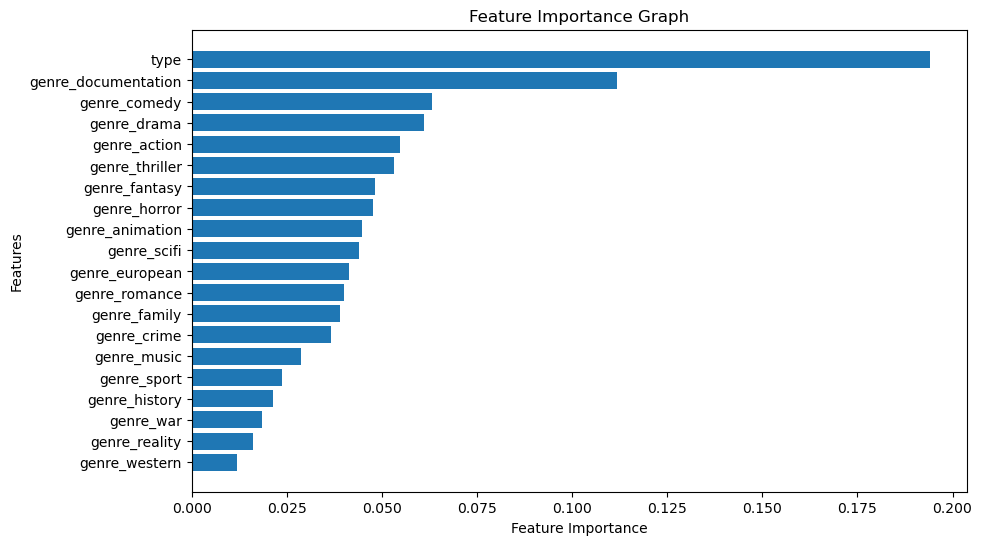

In [136]:
# Plot feature importance graph
# Fit the random forest regressor model to the data
forest_regression.fit(X_train, y_train)
# Extract the importance of each feature from the fitted model
feature_importances = forest_regression.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize = (10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Graph')
plt.savefig('output/genre_importance_score.png')
plt.show()

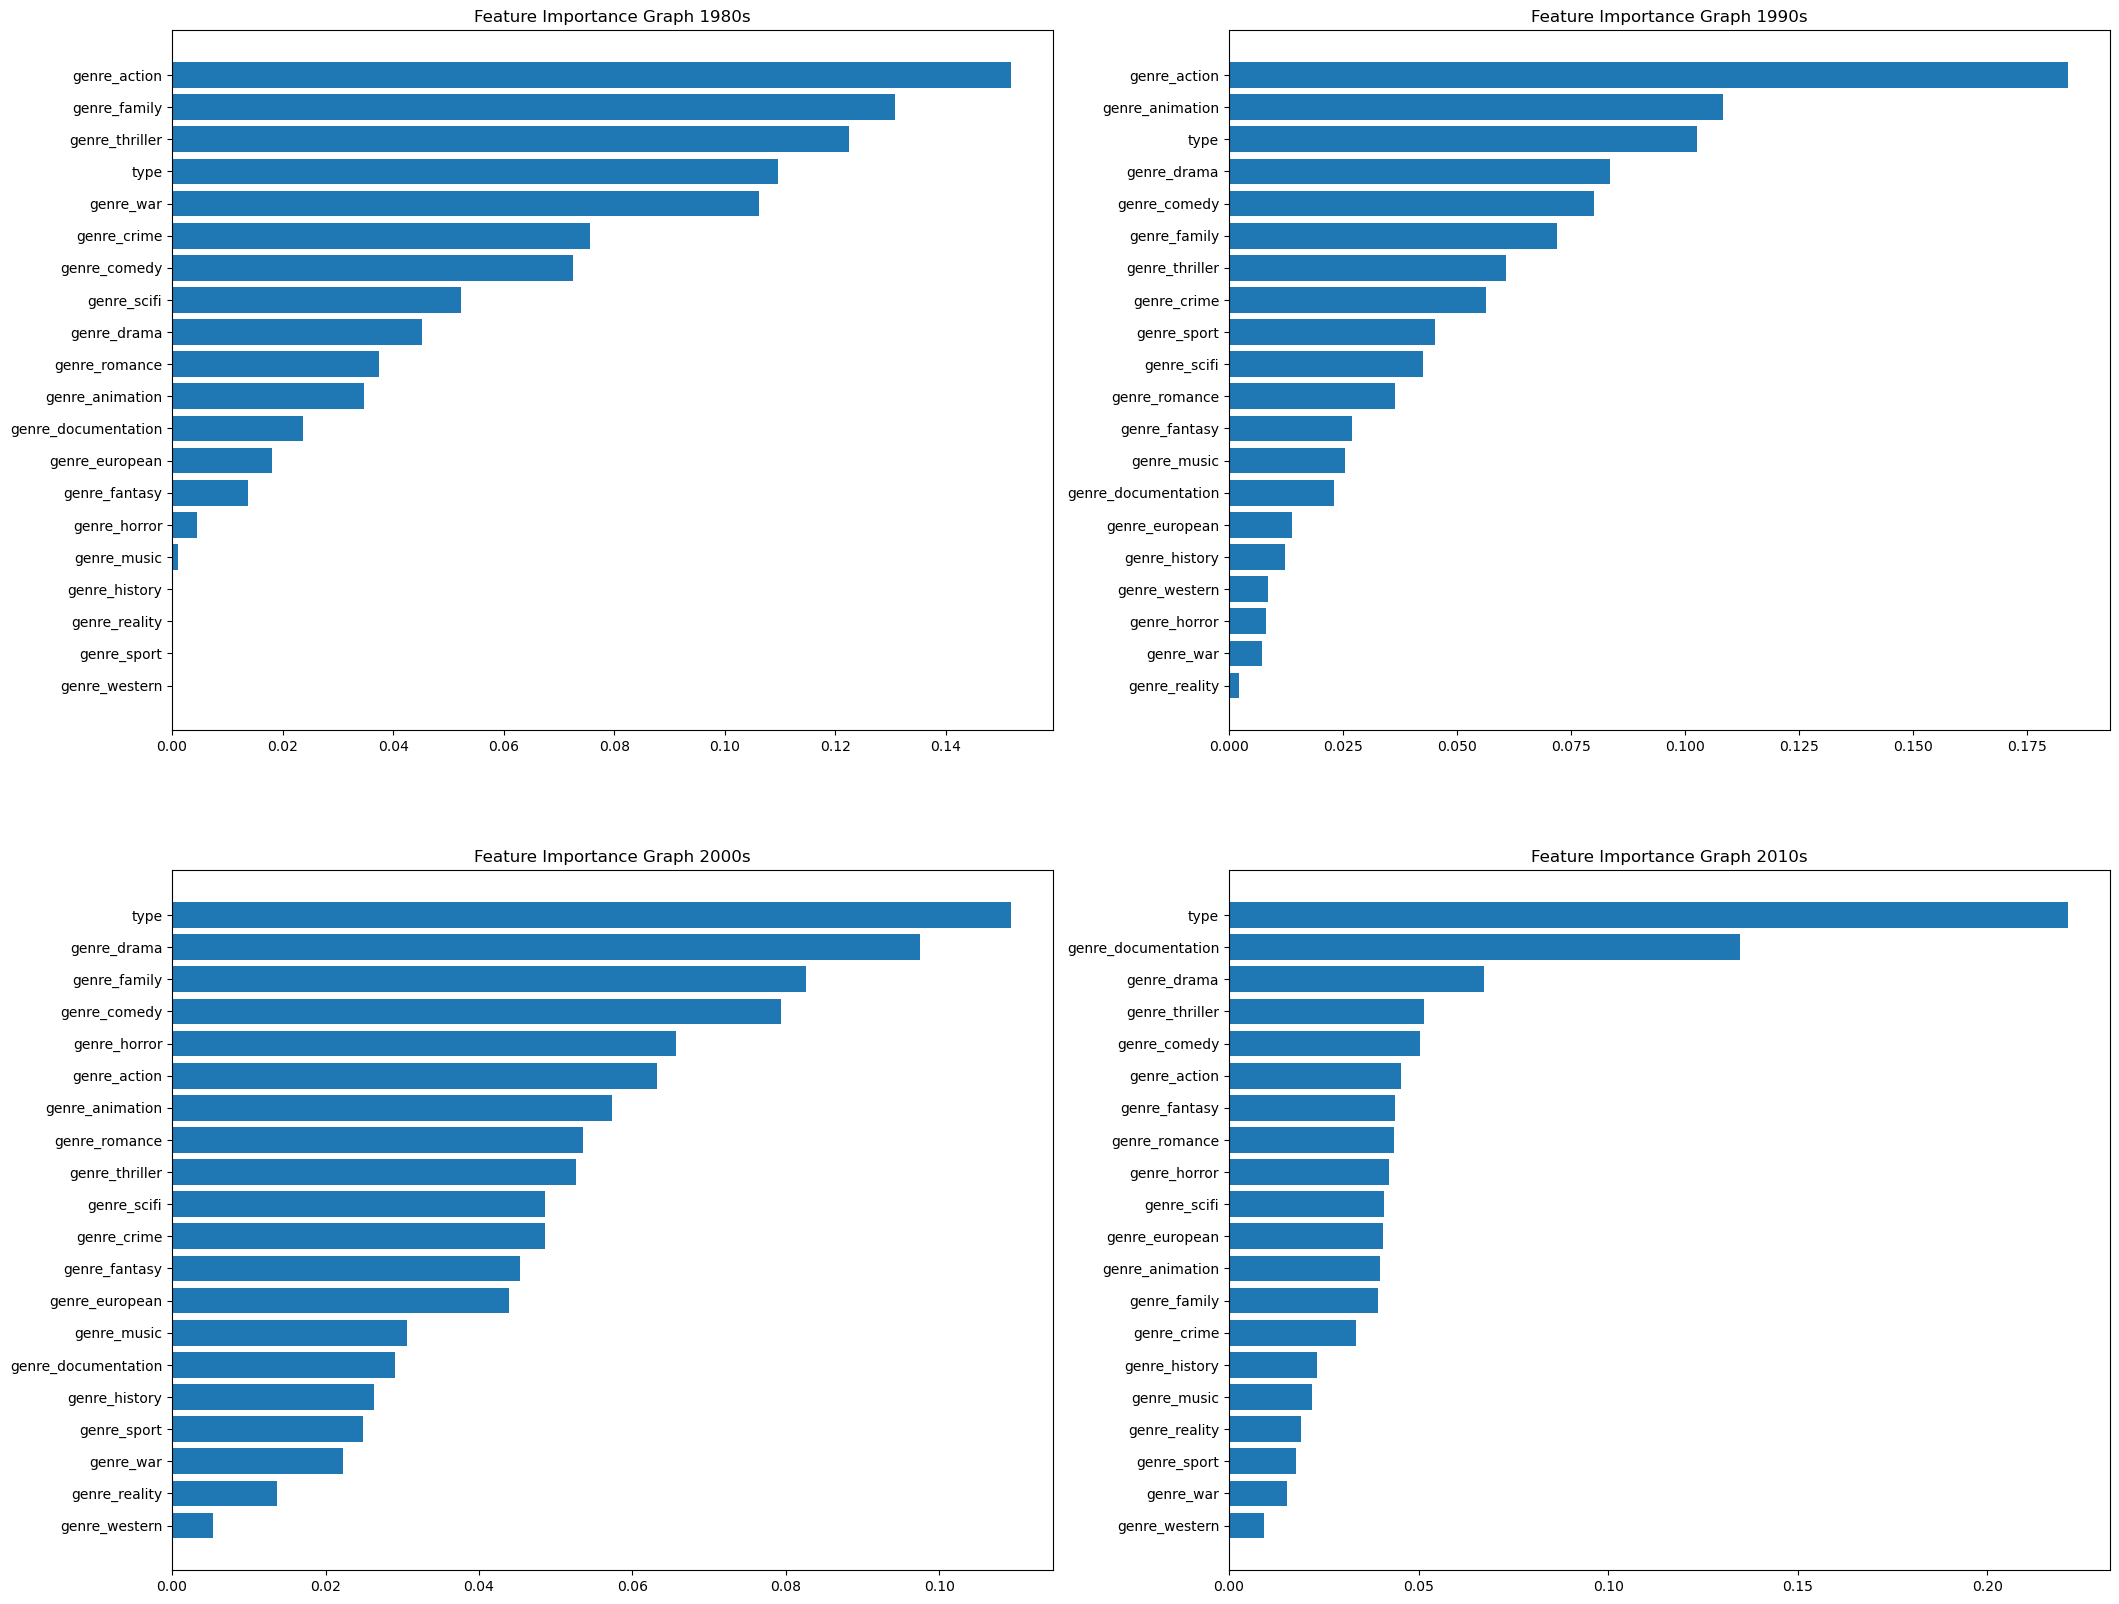

In [137]:
# Plot feature importance graph for each decade

# Pick decade bins
decades = [80, 90, 100, 110]

figure, axis = plt.subplots(2, 2)

# Plot subplot for each decade
for decade in decades:

    # Create new dataframe based on decade
    df_decade = df_cleaned[df_cleaned['decades'] == decade][kept_col]

    # Specify features and target
    X = df_decade.drop(columns=['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])
    y = df_decade['imdb_score']

    # Split the dataset into training and testing sets (80% train, 20% test).
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit decade dataframe to random forest model
    forest_regression.fit(X_train, y_train)

    # Extract the importance of each feature from the fitted model
    feature_importances = forest_regression.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importances)

    # Specify subplot for each decade
    if (decade == 80):
        x1 = 0
        y1 = 0
        dec = '1980s'
    elif (decade == 90):
        x1 = 0
        y1 = 1
        dec = '1990s'
    elif (decade == 100):
        x1 = 1
        y1 = 0
        dec = '2000s'
    else:
        x1 = 1
        y1 = 1
        dec = '2010s'

    # Plot features and target
    axis[x1, y1].barh(range(len(sorted_idx)), feature_importances[sorted_idx])
    axis[x1, y1].set_yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    #axis[x1, y1].set_xlabel('Feature Importance')
    #axis[x1, y1].set_ylabel('Features')
    axis[x1, y1].set_title('Feature Importance Graph ' + dec)


figure.set_figheight(20)
figure.set_figwidth(25)
plt.savefig('output/genre_importance_decade_score.png')
plt.show()
    

In [149]:
#  drop the spefic columns and use the rest of them in data frame df_final as feature varibale Z and tmdb_popularity the target variable X
X = df_final.drop(columns=['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])
Z = df_final['tmdb_popularity']
# Split the dataset into training and testing sets (80% train, 20% test).
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.2, random_state=42)

# Linear Regression model evaluation
linear_regression = LinearRegression()

# Perform 10-fold cross-validation to get negative mean squared error and r^2 scores for the model.
linear_scores = cross_val_score(linear_regression, X, Z, cv=10, scoring='neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_regression, X, Z, cv=10, scoring='r2')

# Convert negative mean squared error scores to root mean squared error (RMSE) scores.
linear_rmse_scores = (-linear_scores)**0.5

# Print out the RMSE scores and their mean for the Linear Regression model.
print("Linear Regression Cross-Validation RMSE Scores:", linear_rmse_scores)
print("Mean RMSE:", linear_rmse_scores.mean())

# Print out the R^2 scores and their mean for the Linear Regression model.
print("Linear Regression Cross-Validation R^2 Scores:", linear_r2_scores)
print("Mean R^2:", linear_r2_scores.mean())

print("\n\n")

# RandomForest model evaluation
# Instantiate the RandomForest Regressor model with 100 trees.
forest_regression = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation to get negative mean squared error and r^2 scores for the RandomForest model.
forest_scores = cross_val_score(forest_regression, X, Z, cv=10, scoring='neg_mean_squared_error')
forest_r2_scores = cross_val_score(forest_regression, X, Z, cv=10, scoring='r2')
forest_rmse_scores = (-forest_scores)**0.5

# print out the RMSE scores and R^2 scores and their mean for the linear Regression model.
print("Random Forest Cross-Validation RMSE Scores:", forest_rmse_scores)
print("Mean RMSE:", forest_rmse_scores.mean())
print("Random Forest Cross-Validation R^2 Scores:", forest_r2_scores)
print("Mean R^2:", forest_r2_scores.mean())

Linear Regression Cross-Validation RMSE Scores: [0.67762384 1.40672616 0.41685404 0.37196478 0.24065104 0.48928987
 0.30337916 0.21231386 2.54088876 0.52315741]
Mean RMSE: 0.7182848917576578
Linear Regression Cross-Validation R^2 Scores: [ 0.07565689  0.0325358   0.04215058 -0.7528166  -2.75812945 -0.05190834
 -1.36729732 -6.75217718 -0.0722491   0.01272644]
Mean R^2: -1.1591508270901374



Random Forest Cross-Validation RMSE Scores: [0.95745634 1.45864232 0.60567843 0.65681731 0.48527103 0.90005488
 0.60883585 0.39267941 2.5551208  0.56956581]
Mean RMSE: 0.9190122164590964
Random Forest Cross-Validation R^2 Scores: [ -0.84541398  -0.04019173  -1.02215026  -4.46540092 -14.28146495
  -2.55945433  -8.53414495 -25.51815101  -0.08429451  -0.17020128]
Mean R^2: -5.752086792908362


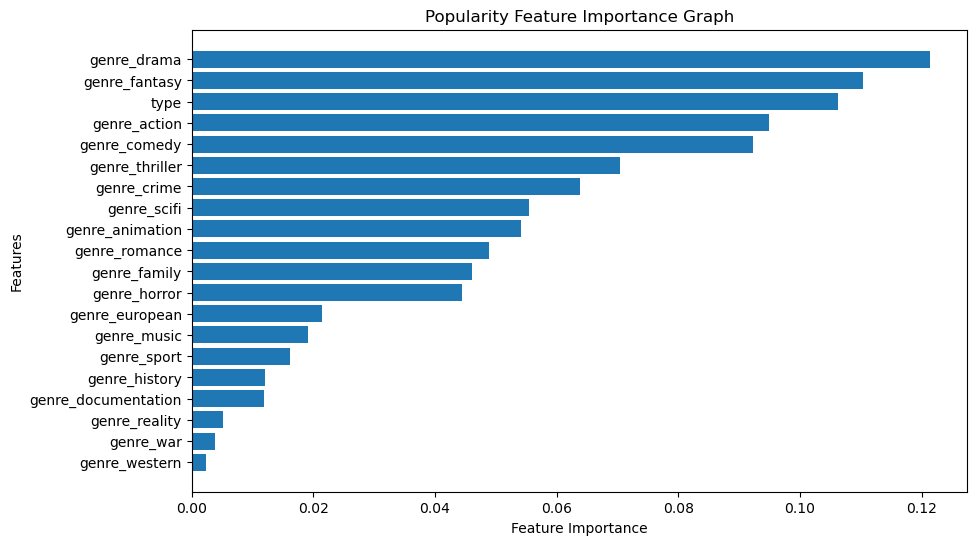

In [150]:
# Plot feature importance graph
# Fit the random forest regressor model to the data
forest_regression.fit(X_train, Z_train)

# Extract the importance of each feature from the fitted model
feature_importances = forest_regression.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize = (10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Popularity Feature Importance Graph')

plt.savefig('output/genre_importance_popularity.png')
plt.show()

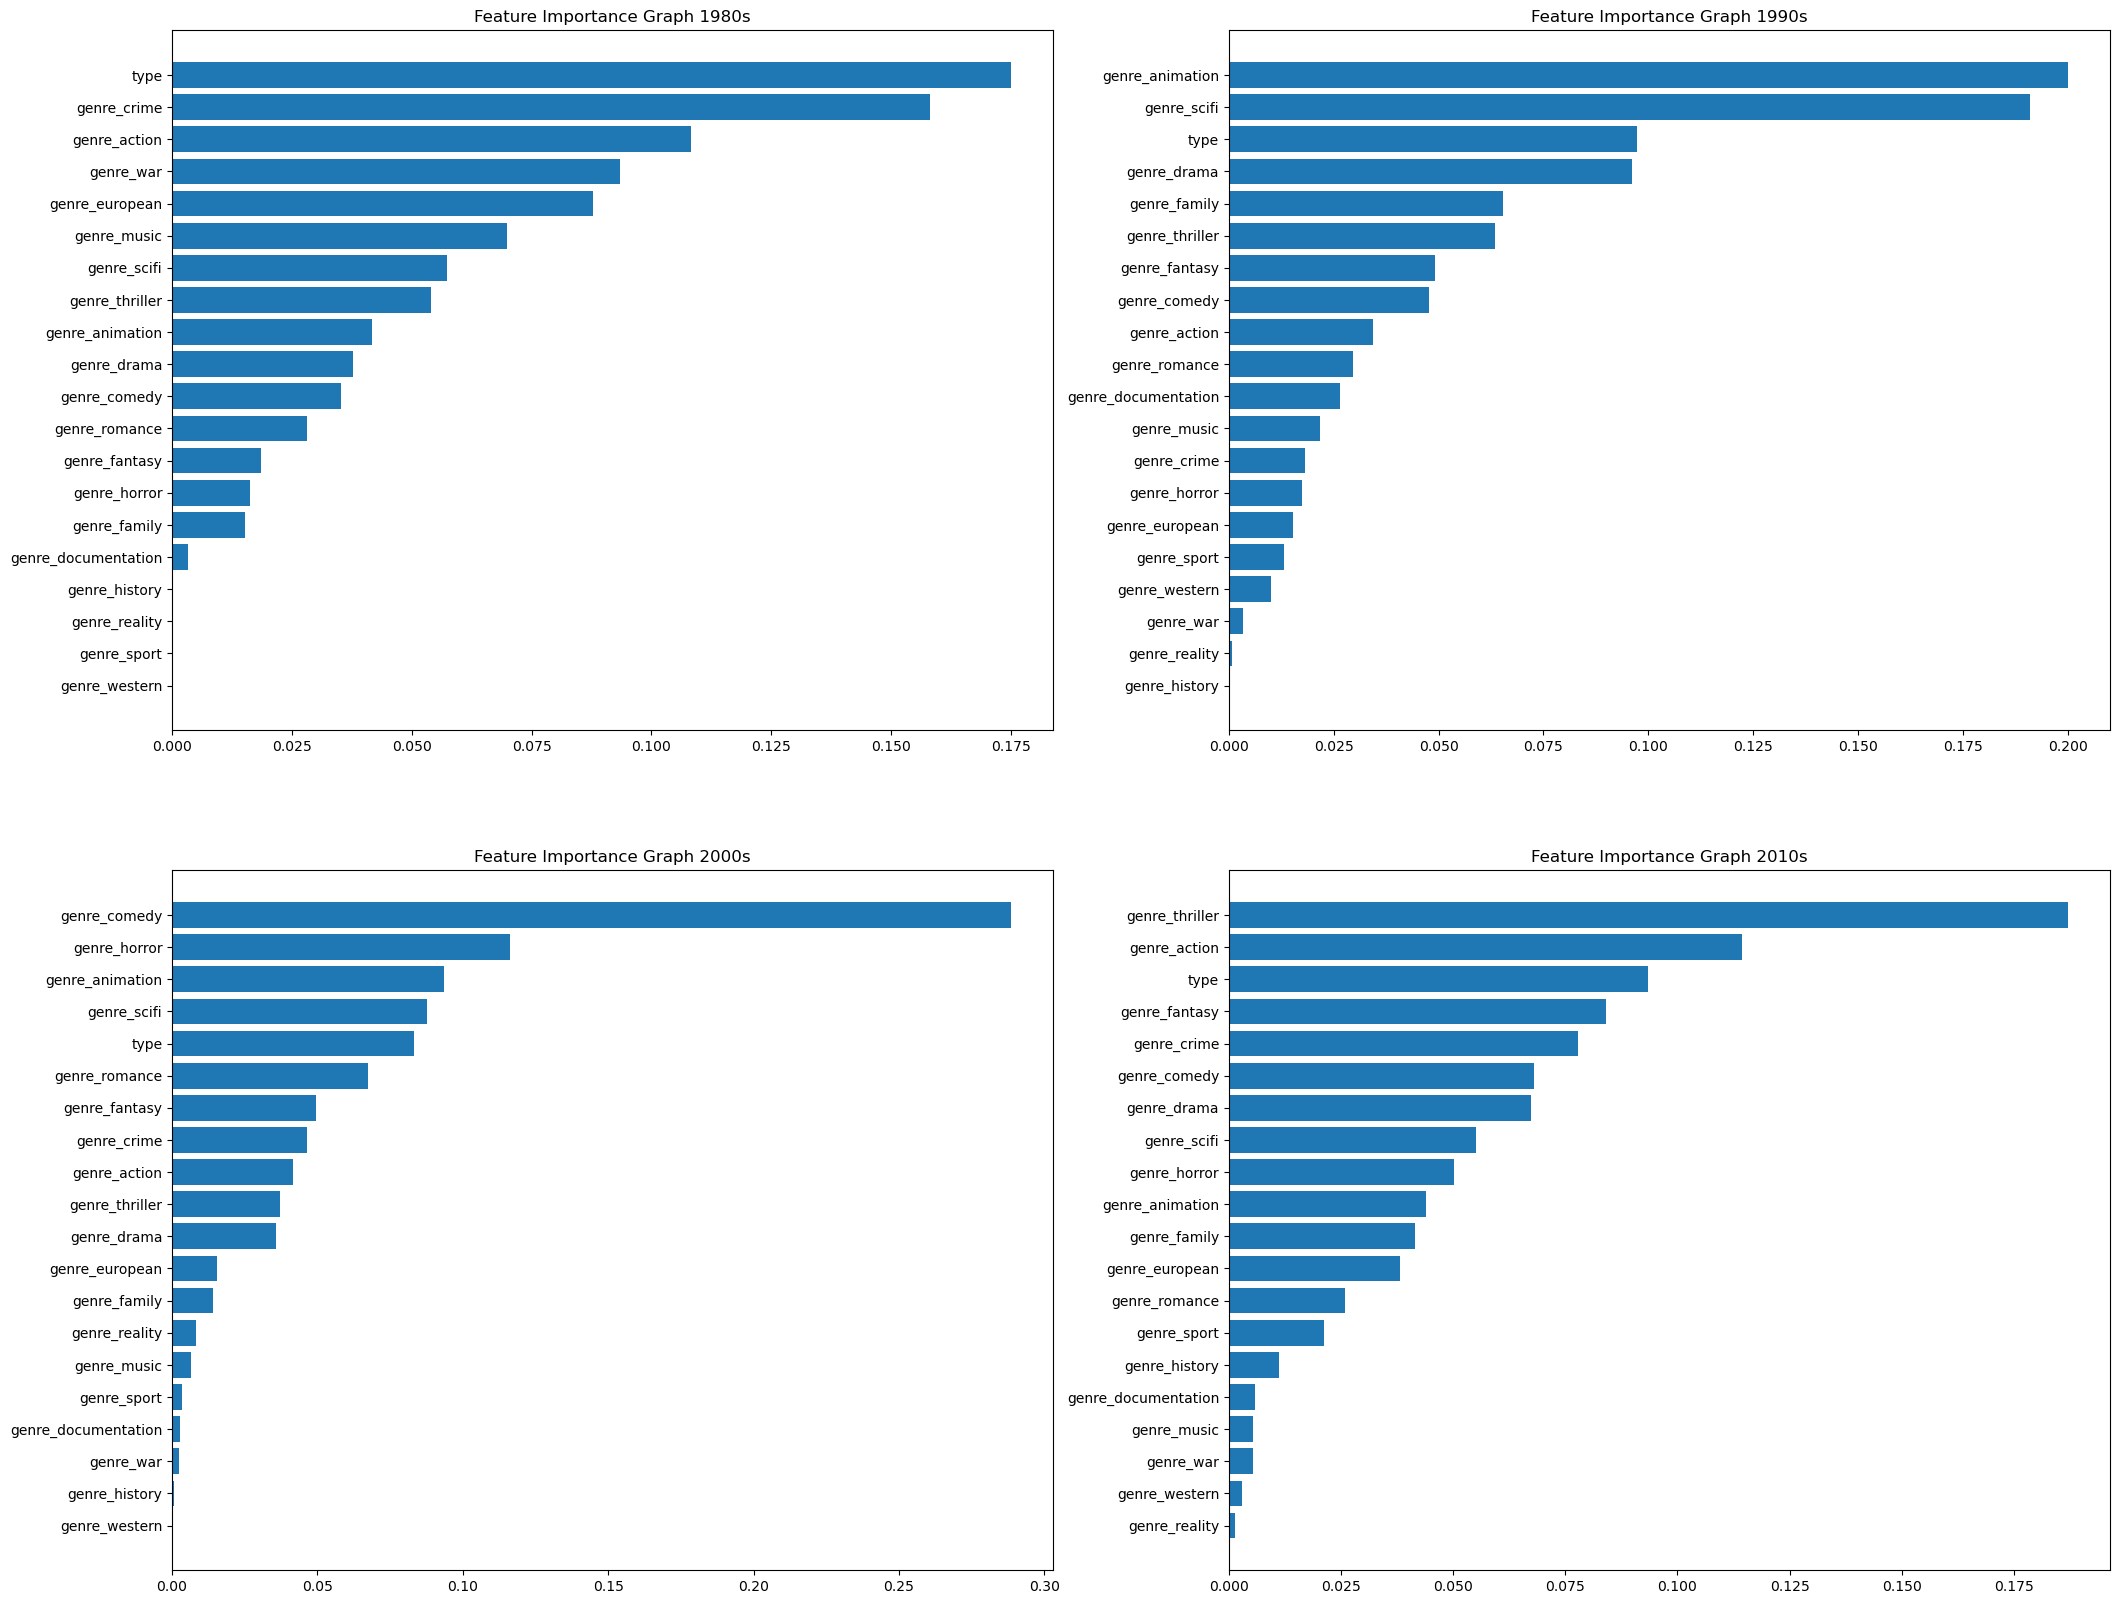

In [153]:
# Plot feature importance graph for each decade

# Pick decade bins
decades = [80, 90, 100, 110]

figure, axis = plt.subplots(2, 2)

# Plot subplot for each decade
for decade in decades:

    # Create new dataframe based on decade
    df_decade = df_cleaned[df_cleaned['decades'] == decade][kept_col]

    # Specify features and target
    X = df_decade.drop(columns=['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])
    Z = df_decade['tmdb_popularity']

    # Split the dataset into training and testing sets (80% train, 20% test).
    X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.2, random_state=42)

    # Fit decade dataframe to random forest model
    forest_regression.fit(X_train, Z_train)

    # Extract the importance of each feature from the fitted model
    feature_importances = forest_regression.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importances)

    # Specify subplot for each decade
    if (decade == 80):
        x1 = 0
        z1 = 0
        dec = '1980s'
    elif (decade == 90):
        x1 = 0
        z1 = 1
        dec = '1990s'
    elif (decade == 100):
        x1 = 1
        z1 = 0
        dec = '2000s'
    else:
        x1 = 1
        z1 = 1
        dec = '2010s'

    # Plot features and target
    axis[x1, z1].barh(range(len(sorted_idx)), feature_importances[sorted_idx])
    axis[x1, z1].set_yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    #axis[x1, z1].set_xlabel('Feature Importance')
    #axis[x1, z1].set_ylabel('Features')
    axis[x1, z1].set_title('Feature Importance Graph ' + dec)


figure.set_figheight(20)
figure.set_figwidth(25)
plt.savefig('output/genre_importance_decade_popularity.png')
plt.show()
    